In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('housing.csv')

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
df.describe().T.style.bar(subset=['mean'], color="#4e4151").background_gradient(subset=['std', '50%', 'max'])

,count,mean,std,min,25%,50%,75%,max
longitude,20640.000000,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
latitude,20640.000000,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
housing_median_age,20640.000000,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
total_rooms,20640.000000,2635.763081,2181.615252,2.000000,1447.750000,2127.000000,3148.000000,39320.000000
total_bedrooms,20433.000000,537.870553,421.385070,1.000000,296.000000,435.000000,647.000000,6445.000000
population,20640.000000,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
households,20640.000000,499.539680,382.329753,1.000000,280.000000,409.000000,605.000000,6082.000000
median_income,20640.000000,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
median_house_value,20640.000000,206855.816909,115395.615874,14999.000000,119600.000000,179700.000000,264725.000000,500001.000000


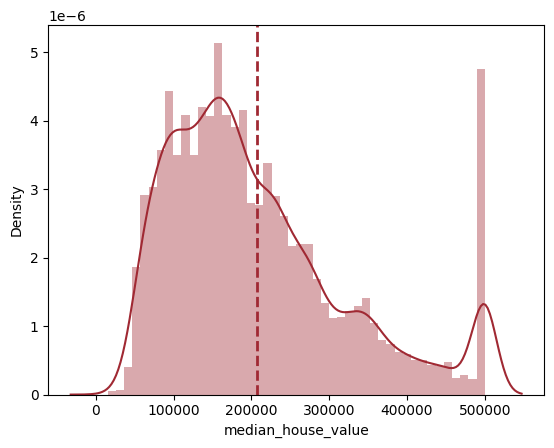

In [11]:
sns.distplot(df['median_house_value'], color='#a02933')
plt.axvline(x=df['median_house_value'].mean(), color='#a02933', linestyle='--', linewidth=2)
plt.show()

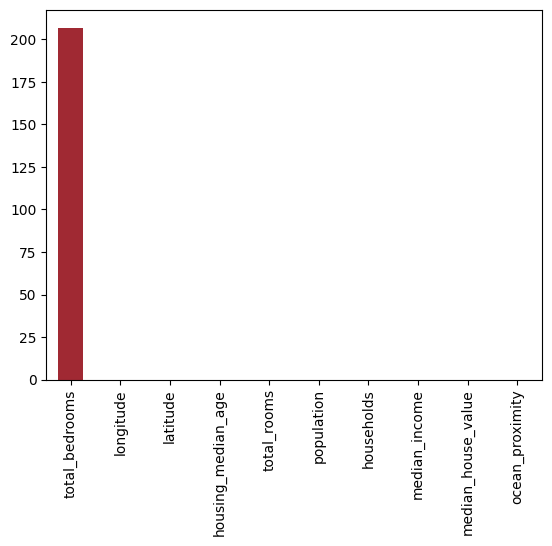

In [13]:
missing = df.isnull().sum()
missing = missing[missing >= 0]
missing = missing.sort_values(ascending=False)
missing.plot.bar(color='#a02933')
plt.show()

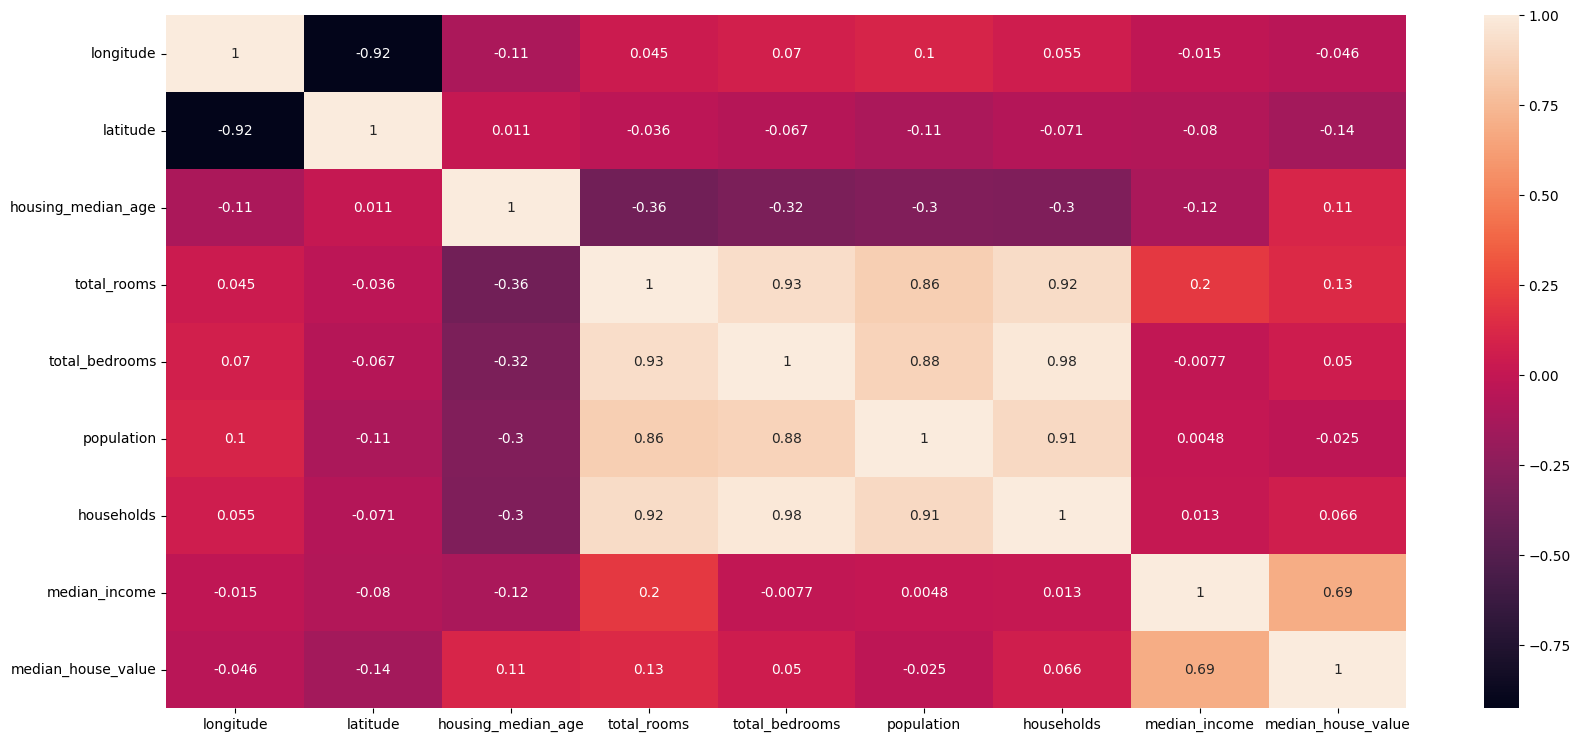

In [15]:
plt.figure(figsize=(20, 9))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [60]:
df_tmp = df.drop(['ocean_proximity'], axis=1)
df_tmp.dropna(inplace=True)

In [61]:
df_tmp.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_tmp)
df_tmp = scaler.transform(df_tmp)


In [89]:
y = df_tmp[:, -1]
X = df_tmp[:, :8]

In [90]:
X

array([[0.21115538, 0.5674814 , 0.78431373, ..., 0.00894083, 0.02055583,
        0.53966842],
       [0.21215139, 0.565356  , 0.39215686, ..., 0.0672104 , 0.18697583,
        0.53802706],
       [0.21015936, 0.5642933 , 1.        , ..., 0.01381765, 0.02894261,
        0.46602805],
       ...,
       [0.31175299, 0.73219979, 0.31372549, ..., 0.0281398 , 0.07104095,
        0.08276438],
       [0.30179283, 0.73219979, 0.33333333, ..., 0.02068444, 0.05722743,
        0.09429525],
       [0.30976096, 0.72582359, 0.29411765, ..., 0.03879032, 0.08699227,
        0.13025338]])

In [91]:
y

array([0.90226638, 0.70824656, 0.69505074, ..., 0.15938285, 0.14371281,
       0.15340349])

In [92]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
train_x.shape

(16346, 8)

In [94]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [95]:
# model instance
model = LinearRegression()
# Training model
model.fit(train_x, train_y)
# Get model's predictions
predicted = model.predict(test_x)
score = np.sqrt(mean_squared_error(test_y, predicted))
score

0.14465119825766456